In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import glob
from os import path
import itertools
from matplotlib.ticker import ScalarFormatter, LogFormatter, LogFormatterExponent, LogFormatterMathtext

In [2]:
%matplotlib inline

In [3]:
from tools import load_nyt_database, FixedOrderFormatter

In [4]:
!ls data/NYT_new/

bicultural.json		 monocultural.json	other ethnicity.json
biethnic.json		 monoethnic.json	other race.json
biracial.json		 monoracial.json	polyculturalism.json
cultural pluralism.json  multiculturalism.json	polycultural.json
interracial.json	 multicultural.json	polyethnic.json
mixed ethnicity.json	 multiethnic.json	polyracial.json
mixed race.json		 multiracial.json


In [5]:
database_norm = load_nyt_database()

In [6]:
def plot(words):
    #markers = itertools.cycle(['s', 'D', '*', 'p', 'h', 'o', '+', 'd'])
    line_types = itertools.cycle(['-', '--', '-.', ':'])
    df = database_norm[words] * 100
    #df = pd.rolling_mean(database_norm[words], 10)
    df = pd.rolling_mean(df, 10)
    plt.figure(figsize=(16,6))

    for i,word in enumerate(words):
        plt.plot(df.index, df[word], next(line_types), linewidth=2,
                 color=str(i/float(len(words)))),
    axis_1 = plt.gca()

    axis_1.set_yscale('log') # You can disable
    axis_1.set_ylim(1e-4, 3e-1) # You can disable
    axis_1.yaxis.set_major_formatter(LogFormatterMathtext())  # You can disable

    axis_1.set_ylabel("Percentage of New York Times Articles ($\%$)")
    axis_1.set_xlabel("Year")
    #axis_1.yaxis.set_major_formatter(FixedOrderFormatter(-3)) # You can enable
    plt.legend(words, loc=2)

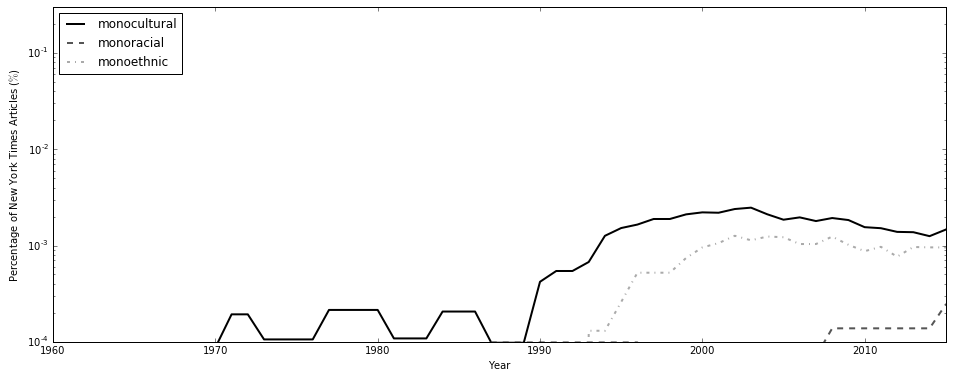

In [7]:
words = ['monocultural', 'monoracial', 'monoethnic']
plot(words)
_ = plt.xlim(1960, 2015)

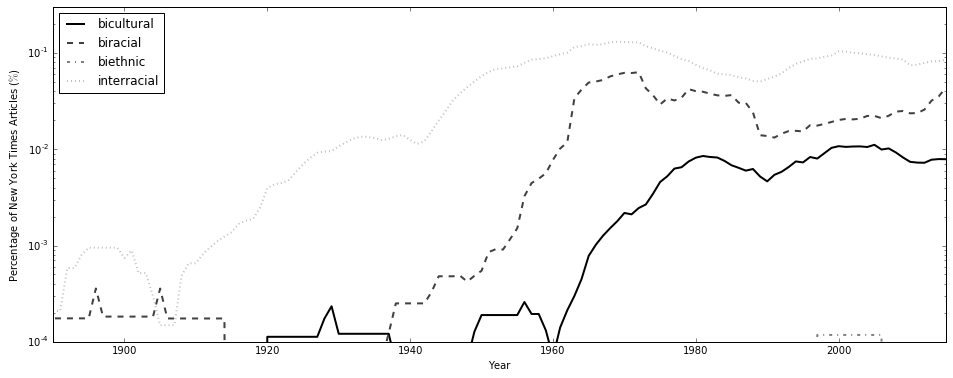

In [8]:
words = ['bicultural', 'biracial', 'biethnic', 'interracial']
plot(words)
_ = plt.xlim(1890, 2015)

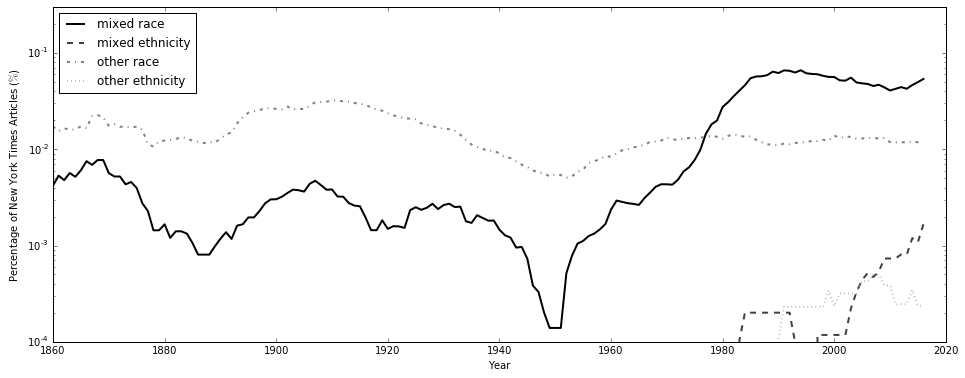

In [9]:
words = ['mixed race', 'mixed ethnicity', 'other race', 'other ethnicity']
plot(words)

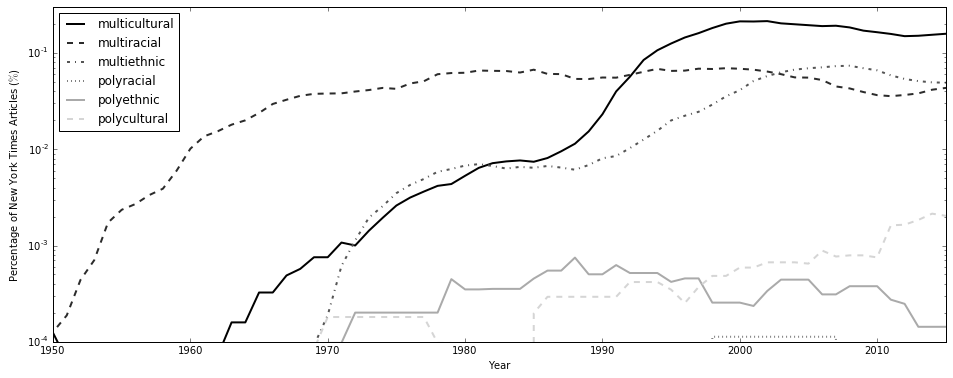

In [10]:
words = ['multicultural', 'multiracial', 'multiethnic', 'polyracial', 'polyethnic', 'polycultural']
plot(words)
_ = plt.xlim(1950, 2015)

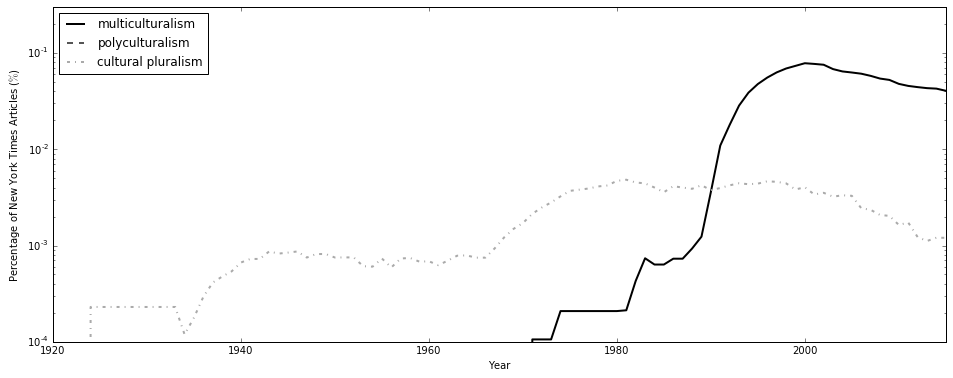

In [11]:
words = ['multiculturalism', 'polyculturalism', 'cultural pluralism']
plot(words)
_ = plt.xlim(1920, 2015)

polyculturalism has no frequency in NYT

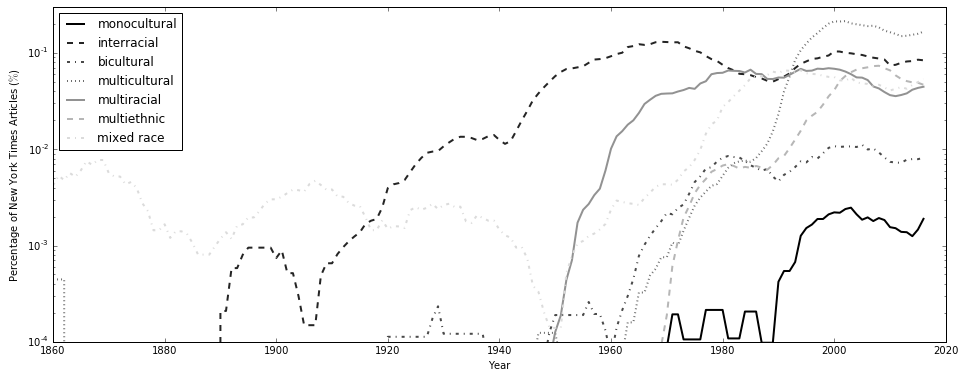

In [12]:
words = ['monocultural', 'interracial', 'bicultural', 'multicultural', 'multiracial', 'multiethnic', 'mixed race']
plot(words)

# To Do

1. Fix plots (not identical to previous smoothened plots)
1. Strange gap at the bottom (I tried to fix this by changing the y-limit)